**Expected allele frequency & heterozygosity from cumulants**

First cumulant $\kappa_1$ is the mean, second cumulant $\kappa_2$ is the variance.

Need to undo earlier scaling on these values.

Let $\mu_x$ be the expected allele frequency. Then,
$$\mu_x=\frac{(D/s)^{d/2}\mathcal{N}\mu}{s(D/s)^{d/2}\mathcal{N}}\kappa_1=\frac{\mu}{s}$$
since $\kappa_1$ is always 1.

Let $H_E$ be the expected heterozygosity. This is given by 2 time the variance of $x$, and the variance of $x$ is given by $\kappa_2$. So, need to un-scale $\kappa_2$. 

$$H_E=2\frac{(D/s)^{d/2}\mathcal{N}\mu}{s^2(D/s)^d\mathcal{N}}\kappa_2=\frac{2\mu}{s^2\ell_c^d}\kappa_2$$

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# read in cumulants
data = pd.read_csv("files_v1_20221007/spatial_integrals_dim1.csv") 
data

,sigma,u2_GQ,u3_GQ,u4_GQ
0,0.01000,0.249552,0.071945,0.022342
1,0.11009,0.245133,0.069751,0.021399
2,0.21018,0.240836,0.067642,0.020503
3,0.31027,0.236658,0.065615,0.019651
4,0.41036,0.232592,0.063666,0.018842
...,...,...,...,...
995,99.59964,0.008880,0.000121,0.000002
996,99.69973,0.008871,0.000121,0.000002
997,99.79982,0.008863,0.000121,0.000002
998,99.89991,0.008854,0.000121,0.000002


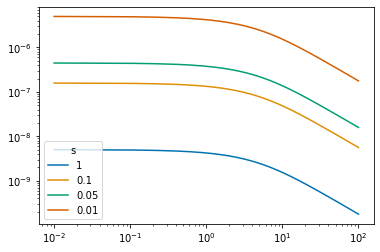

In [16]:
def calc_H_cumulants(kappa_list,s,mu=1e-8,D=1,d=1):
    scale_term = (2*mu)/(s*s*np.sqrt(D/s))
    H_list = [scale_term*k for k in kappa_list]
    return(H_list)
    
sigma_list = data['sigma'].tolist()
# H_list = calc_H_cumulants(data['u2_GQ'].tolist(),0.1)

colors = sns.color_palette("colorblind",4)

fig, ax = plt.subplots()
ax.plot(sigma_list,calc_H_cumulants(data['u2_GQ'].tolist(),1),color=colors[0])
ax.plot(sigma_list,calc_H_cumulants(data['u2_GQ'].tolist(),0.1),color=colors[1])
ax.plot(sigma_list,calc_H_cumulants(data['u2_GQ'].tolist(),0.05),color=colors[2])
ax.plot(sigma_list,calc_H_cumulants(data['u2_GQ'].tolist(),0.01),color=colors[3])
ax.legend(labels=['1','0.1','0.05','0.01'],title="s")
plt.xscale("log")
plt.yscale("log")
plt.show()